In [1]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import time
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)



In [2]:
import pandas as pd
url_string = 'https://github.com/Bishwaprotapi/Cardiovascular-Disease-Risk-Classification-Using-Machine-Learning-Techniques/blob/main/CVD_Dataset.csv'

In [3]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv('CVD_Dataset.csv')
df

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.100,1.710,23.600,86.200,125/79,248.0,78.0,111.0,N,Y,Low,N,INTERMEDIARY,171.000,0.504,125.0,79.0,Elevated,140.0,17.930
1,F,55.0,118.700,1.690,41.600,82.500,139/70,162.0,50.0,135.0,Y,Y,High,Y,HIGH,169.000,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.510
2,M,NaN,NaN,1.830,26.900,106.700,104/77,103.0,73.0,114.0,N,N,High,Y,INTERMEDIARY,183.000,0.583,104.0,77.0,Normal,0.0,12.640
3,M,44.0,108.300,1.800,33.400,96.600,140/83,134.0,46.0,91.0,N,N,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.360
4,F,32.0,99.500,1.860,28.800,102.700,144/83,146.0,64.0,141.0,Y,Y,High,N,INTERMEDIARY,186.000,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,F,40.0,72.070,1.889,NaN,95.326,119/66,157.0,60.0,93.0,N,N,Moderate,Y,LOW,188.894,0.505,119.0,66.0,Normal,67.0,14.300
1525,F,78.0,85.877,1.825,24.426,112.340,102/115,241.0,84.0,NaN,Y,N,Low,N,INTERMEDIARY,182.485,0.616,102.0,115.0,Hypertension Stage 2,127.0,14.805
1526,M,39.0,98.626,1.521,20.055,77.193,150/90,237.0,82.0,147.0,N,Y,High,N,INTERMEDIARY,152.119,0.507,150.0,90.0,Hypertension Stage 2,125.0,18.251
1527,M,71.0,116.163,1.841,29.279,114.197,112/63,193.0,84.0,123.0,N,N,High,Y,INTERMEDIARY,184.059,0.620,112.0,63.0,Normal,79.0,15.316


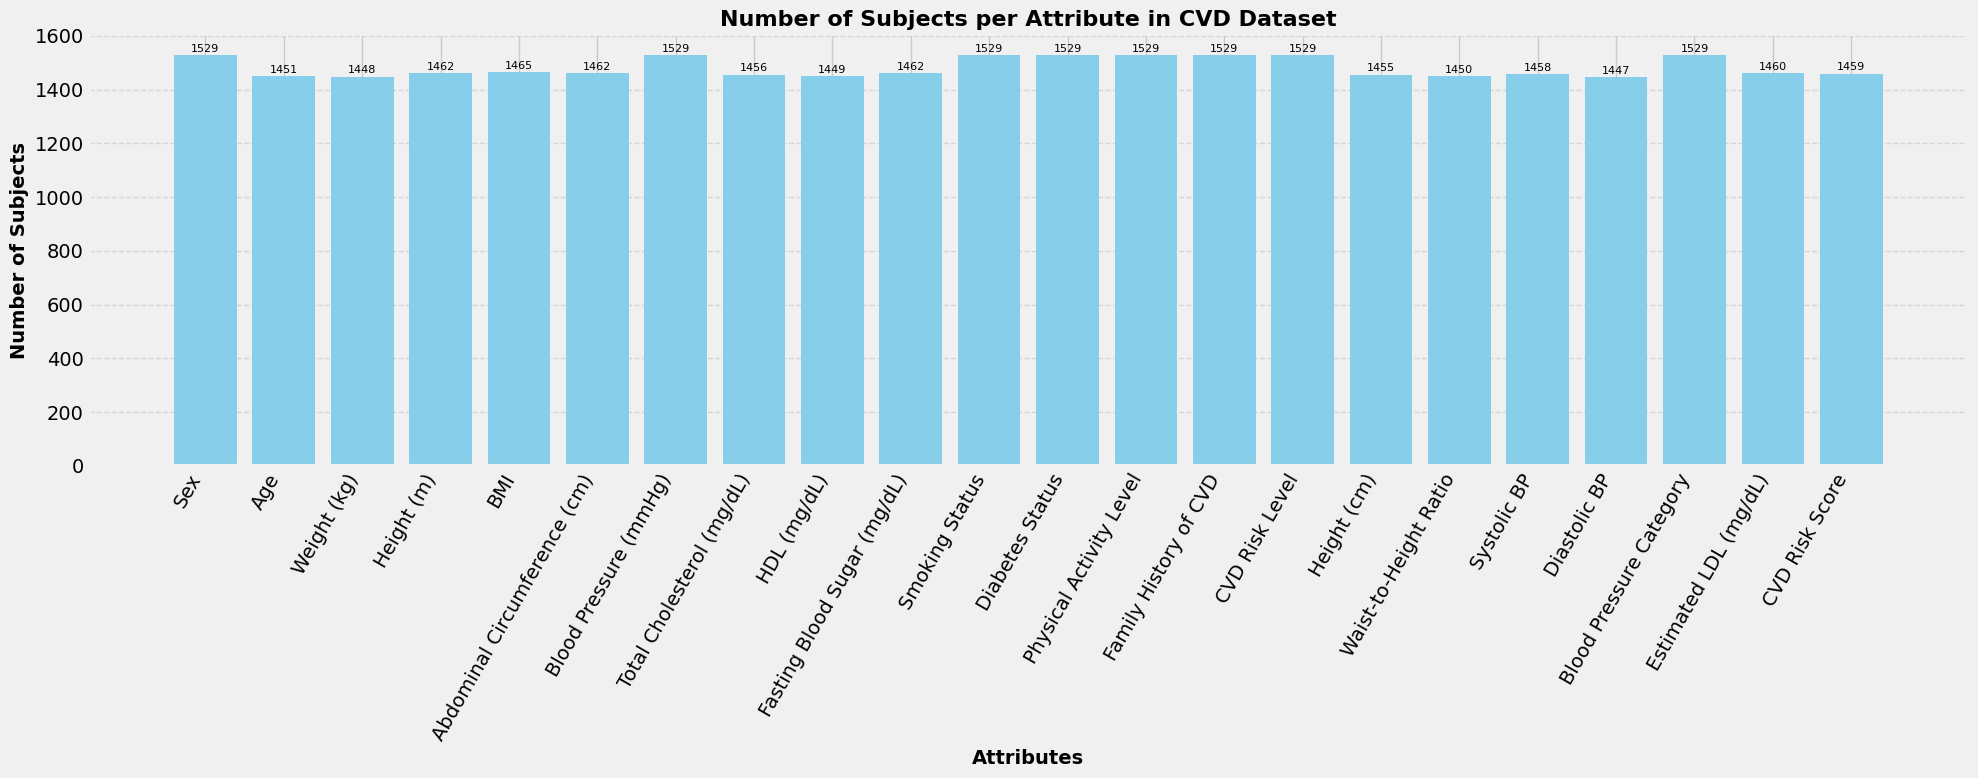

In [4]:
# CVD Dataset Structure: Number of Subjects per Attribute

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('CVD_Dataset.csv')

# Count the number of non-null entries for each column
attribute_counts = df.notnull().sum()

# Plotting
plt.figure(figsize=(20, 8))
bars = plt.bar(attribute_counts.index, attribute_counts.values, color='skyblue')

# Adding counts above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval), ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.xticks(rotation=60, ha='right')
plt.xlabel('Attributes', fontsize=14, weight='bold')
plt.ylabel('Number of Subjects', fontsize=14, weight='bold')
plt.title('Number of Subjects per Attribute in CVD Dataset', fontsize=16, weight='bold')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [5]:
df.head(10)

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,N,Y,Low,N,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,Y,Y,High,Y,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,N,N,High,Y,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,N,N,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,Y,Y,High,N,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88
5,F,58.0,117.9,1.87,33.7,81.4,142/90,156.0,67.0,82.0,Y,N,Moderate,Y,HIGH,187.0,0.435,142.0,90.0,Hypertension Stage 2,59.0,16.96
6,M,33.0,117.9,1.82,35.6,74.8,96/63,184.0,66.0,87.0,N,Y,Low,N,INTERMEDIARY,182.0,0.411,96.0,63.0,Normal,88.0,17.60
7,M,55.0,100.1,1.74,33.1,96.6,115/73,287.0,40.0,96.0,Y,N,Moderate,N,HIGH,174.0,0.555,115.0,73.0,Normal,217.0,18.11
8,F,37.0,110.1,1.86,31.8,92.4,107/95,177.0,68.0,70.0,Y,N,High,N,INTERMEDIARY,186.0,0.497,NaN,95.0,Hypertension Stage 2,79.0,15.25
9,F,58.0,97.6,1.86,28.2,74.6,133/83,281.0,68.0,126.0,N,N,Moderate,N,INTERMEDIARY,186.0,0.401,133.0,83.0,Hypertension Stage 1,183.0,17.91


In [6]:
df.tail(10)

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
1519,F,53.0,101.530,1.727,35.423,110.121,143/67,174.0,38.0,161.0,Y,Y,High,Y,HIGH,172.657,0.638,143.0,67.0,Hypertension Stage 2,106.0,19.715
1520,M,29.0,89.388,1.716,26.208,78.400,165/72,223.0,49.0,94.0,N,Y,Low,N,LOW,171.635,0.457,165.0,72.0,Hypertension Stage 2,144.0,19.952
1521,F,48.0,116.299,1.665,23.504,107.219,97/74,216.0,82.0,168.0,Y,Y,Moderate,N,LOW,166.474,0.644,97.0,74.0,Normal,104.0,15.871
1522,F,41.0,117.365,1.748,38.310,118.246,105/87,200.0,35.0,87.0,Y,Y,High,N,INTERMEDIARY,174.814,0.676,105.0,87.0,Hypertension Stage 1,135.0,18.912
1523,M,63.0,91.625,1.702,35.278,NaN,162/60,189.0,76.0,153.0,N,Y,Moderate,N,INTERMEDIARY,NaN,0.601,162.0,60.0,Hypertension Stage 2,83.0,20.936
1524,F,40.0,72.070,1.889,NaN,95.326,119/66,157.0,60.0,93.0,N,N,Moderate,Y,LOW,188.894,0.505,119.0,66.0,Normal,67.0,14.300
1525,F,78.0,85.877,1.825,24.426,112.340,102/115,241.0,84.0,NaN,Y,N,Low,N,INTERMEDIARY,182.485,0.616,102.0,115.0,Hypertension Stage 2,127.0,14.805
1526,M,39.0,98.626,1.521,20.055,77.193,150/90,237.0,82.0,147.0,N,Y,High,N,INTERMEDIARY,152.119,0.507,150.0,90.0,Hypertension Stage 2,125.0,18.251
1527,M,71.0,116.163,1.841,29.279,114.197,112/63,193.0,84.0,123.0,N,N,High,Y,INTERMEDIARY,184.059,0.620,112.0,63.0,Normal,79.0,15.316
1528,F,78.0,111.627,1.867,22.017,97.692,134/67,218.0,68.0,166.0,N,N,High,N,HIGH,186.735,0.523,134.0,67.0,Hypertension Stage 1,120.0,15.463


In [7]:
df.drop(columns=['Height (cm)'], inplace=True)

In [8]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 21
Number of Instances In Dataset :  1529


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [10]:
df.head(10)

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,N,Y,Low,N,INTERMEDIARY,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,Y,Y,High,Y,HIGH,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,N,N,High,Y,INTERMEDIARY,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,N,N,High,Y,INTERMEDIARY,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,Y,Y,High,N,INTERMEDIARY,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88
5,F,58.0,117.9,1.87,33.7,81.4,142/90,156.0,67.0,82.0,Y,N,Moderate,Y,HIGH,0.435,142.0,90.0,Hypertension Stage 2,59.0,16.96
6,M,33.0,117.9,1.82,35.6,74.8,96/63,184.0,66.0,87.0,N,Y,Low,N,INTERMEDIARY,0.411,96.0,63.0,Normal,88.0,17.60
7,M,55.0,100.1,1.74,33.1,96.6,115/73,287.0,40.0,96.0,Y,N,Moderate,N,HIGH,0.555,115.0,73.0,Normal,217.0,18.11
8,F,37.0,110.1,1.86,31.8,92.4,107/95,177.0,68.0,70.0,Y,N,High,N,INTERMEDIARY,0.497,NaN,95.0,Hypertension Stage 2,79.0,15.25
9,F,58.0,97.6,1.86,28.2,74.6,133/83,281.0,68.0,126.0,N,N,Moderate,N,INTERMEDIARY,0.401,133.0,83.0,Hypertension Stage 1,183.0,17.91


In [11]:
df.describe()

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1451.000000,1448.000000,1462.000000,1465.000000,1462.000000,1456.000000,1449.000000,1462.000000,1450.000000,1458.000000,1447.000000,1460.000000,1459.000000
mean,47.025500,85.917427,1.754111,28.465997,91.773214,198.539148,56.197378,117.485636,0.525727,125.627572,82.917761,111.550685,16.960925
std,12.421063,21.012580,0.113090,7.038685,12.823573,57.794099,16.066754,30.289174,0.081213,22.112099,14.731277,58.866220,2.436192
min,25.000000,50.100000,1.502000,15.000000,70.000000,100.000000,30.000000,70.000000,0.360000,90.000000,60.000000,-18.000000,10.530000
25%,37.000000,67.050000,1.660000,22.629000,80.500000,150.000000,42.000000,92.000000,0.460000,107.000000,71.000000,61.000000,15.205000
50%,46.000000,86.614500,1.755000,28.159000,91.600000,197.000000,56.000000,115.000000,0.522000,125.000000,82.000000,109.000000,16.880000
75%,55.000000,105.000000,1.845500,34.000000,102.269000,249.000000,70.000000,138.000000,0.583750,141.000000,93.000000,159.000000,18.630000
max,79.000000,120.000000,2.000000,46.200000,119.996000,300.000000,89.000000,198.000000,0.787000,179.000000,119.000000,237.000000,24.170000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam